In [1]:
from clean2 import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# data wrangling
df = data_wrangling()
df
mta_station_info = pd.read_csv("http://web.mta.info/developers/data/nyct/subway/Stations.csv")
mta_station_info.rename(columns={'Stop Name': 'STATION', 'GTFS Latitude': 'Lat', 'GTFS Longitude': 'Lon'}, inplace=True)

In [3]:
mta_station_info.columns

Index(['Station ID', 'Complex ID', 'GTFS Stop ID', 'Division', 'Line',
       'STATION', 'Borough', 'Daytime Routes', 'Structure', 'Lat', 'Lon',
       'North Direction Label', 'South Direction Label', 'ADA', 'ADA Notes'],
      dtype='object')

In [4]:
mta_station_info.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,STATION,Borough,Daytime Routes,Structure,Lat,Lon,North Direction Label,South Direction Label,ADA,ADA Notes
0,1,1,R01,BMT,Astoria,Astoria-Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan,0,NaN
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,1,NaN
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,0,NaN
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan,0,NaN
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan,0,NaN


In [5]:
# get_daily_entries
tmp = get_tmp_entries(df)

In [6]:
tmp[tmp['DATE'] == '09/14/2016'].sort_values("TMP_ENTRIES", ascending=False).head(10)

,C/A,UNIT,SCP,STATION,DATE,AMPM,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,TMP_ENTRIES,TMP_EXITS


In [7]:
daily = tmp.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", 'DAY_NAME'], as_index=False).TMP_ENTRIES.sum()
daily.rename(columns={"TMP_ENTRIES": "DAILY_ENTRIES"}, inplace=True)
t = tmp.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", 'DAY_NAME'], as_index=False).TMP_EXITS.sum()
# daily_entries.sort_values('DAILY_ENTRIES', ascending=False)
daily['DAILY_EXITS'] = t.TMP_EXITS
daily["DAILY_TRAFFIC"] = daily.DAILY_ENTRIES + daily.DAILY_EXITS
daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,DAY_NAME,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
0,A002,R051,02-00-00,59 ST,10/06/2019,Sunday,63.0,10.0,73.0
1,A002,R051,02-00-00,59 ST,10/07/2019,Monday,1281.0,565.0,1846.0
2,A002,R051,02-00-00,59 ST,10/08/2019,Tuesday,2727.0,944.0,3671.0
3,A002,R051,02-00-00,59 ST,10/09/2019,Wednesday,2459.0,919.0,3378.0
4,A002,R051,02-00-00,59 ST,10/10/2019,Thursday,2489.0,1042.0,3531.0
5,A002,R051,02-00-00,59 ST,10/11/2019,Friday,2892.0,1063.0,3955.0
6,A002,R051,02-00-01,59 ST,10/06/2019,Sunday,59.0,19.0,78.0
7,A002,R051,02-00-01,59 ST,10/07/2019,Monday,1072.0,266.0,1338.0
8,A002,R051,02-00-01,59 ST,10/08/2019,Tuesday,2214.0,539.0,2753.0
9,A002,R051,02-00-01,59 ST,10/09/2019,Wednesday,2059.0,534.0,2593.0


## Here we identified top 10 most trafficked stations based on DAILY_TRAFFIC


In [8]:
t = (daily
     .groupby(["STATION"], as_index=False)
     .sum()
     .sort_values("DAILY_TRAFFIC", ascending=False))
t.head(10)



,STATION,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
61,34 ST-PENN STA,1823158.0,1684960.0,3508118.0
232,GRD CNTRL-42 ST,1554781.0,1545079.0,3099860.0
59,34 ST-HERALD SQ,1328173.0,1238672.0,2566845.0
46,23 ST,1273215.0,961837.0,2235052.0
351,TIMES SQ-42 ST,1098896.0,1046138.0,2145034.0
14,14 ST-UNION SQ,1087467.0,1028129.0,2115596.0
68,42 ST-PORT AUTH,1148033.0,941150.0,2089183.0
225,FULTON ST,1034026.0,939188.0,1973214.0
110,86 ST,944516.0,911698.0,1856214.0
9,125 ST,893021.0,753744.0,1646765.0


In [9]:
mta_station_info

,Station ID,Complex ID,GTFS Stop ID,Division,Line,STATION,Borough,Daytime Routes,Structure,Lat,Lon,North Direction Label,South Direction Label,ADA,ADA Notes
0,1,1,R01,BMT,Astoria,Astoria-Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan,0,NaN
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,1,NaN
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,0,NaN
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan,0,NaN
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,517,517,S15,SIR,Staten Island,Prince's Bay,SI,SIR,Open Cut,40.525507,-74.200064,St George,Tottenville,0,NaN
492,518,518,S14,SIR,Staten Island,Pleasant Plains,SI,SIR,Embankment,40.522410,-74.217847,St George,Tottenville,0,NaN
493,519,519,S13,SIR,Staten Island,Richmond Valley,SI,SIR,Open Cut,40.519631,-74.229141,St George,Tottenville,0,NaN
494,522,522,S09,SIR,Staten Island,Tottenville,SI,SIR,At Grade,40.512764,-74.251961,St George,NaN,1,NaN


In [10]:
t.set_index(['STATION'], inplace=True)
t.index

Index(['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', '23 ST',
       'TIMES SQ-42 ST', '14 ST-UNION SQ', '42 ST-PORT AUTH', 'FULTON ST',
       '86 ST', '125 ST',
       ...
       'BEACH 36 ST', 'NEPTUNE AV', 'AQUEDUCT RACETR', 'BEACH 44 ST',
       'BEACH 90 ST', 'ROCKAWAY PARK B', 'BEACH 98 ST', 'TOMPKINSVILLE',
       'BEACH 105 ST', 'BROAD CHANNEL'],
      dtype='object', name='STATION', length=377)

In [11]:
mta_station_info['STATION'] = mta_station_info['STATION'].str.upper()
mta_station_info.set_index(['STATION'], inplace=True)
mta_station_info.index

Index(['ASTORIA-DITMARS BLVD', 'ASTORIA BLVD', '30 AV', 'BROADWAY', '36 AV',
       '39 AV-DUTCH KILLS', 'LEXINGTON AV/59 ST', '5 AV/59 ST', '57 ST-7 AV',
       '49 ST',
       ...
       'BAY TERRACE', 'GREAT KILLS', 'ELTINGVILLE', 'ANNADALE', 'HUGUENOT',
       'PRINCE'S BAY', 'PLEASANT PLAINS', 'RICHMOND VALLEY', 'TOTTENVILLE',
       'ARTHUR KILL'],
      dtype='object', name='STATION', length=496)

In [12]:
mta_station_info

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Borough,Daytime Routes,Structure,Lat,Lon,North Direction Label,South Direction Label,ADA,ADA Notes
STATION,,,,,,,,,,,,,,
ASTORIA-DITMARS BLVD,1,1,R01,BMT,Astoria,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan,0,NaN
ASTORIA BLVD,2,2,R03,BMT,Astoria,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,1,NaN
30 AV,3,3,R04,BMT,Astoria,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,0,NaN
BROADWAY,4,4,R05,BMT,Astoria,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan,0,NaN
36 AV,5,5,R06,BMT,Astoria,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRINCE'S BAY,517,517,S15,SIR,Staten Island,SI,SIR,Open Cut,40.525507,-74.200064,St George,Tottenville,0,NaN
PLEASANT PLAINS,518,518,S14,SIR,Staten Island,SI,SIR,Embankment,40.522410,-74.217847,St George,Tottenville,0,NaN
RICHMOND VALLEY,519,519,S13,SIR,Staten Island,SI,SIR,Open Cut,40.519631,-74.229141,St George,Tottenville,0,NaN


In [13]:
g = pd.merge(mta_station_info, t, on='STATION', how='right')
g

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Borough,Daytime Routes,Structure,Lat,Lon,North Direction Label,South Direction Label,ADA,ADA Notes,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
STATION,,,,,,,,,,,,,,,,,
34 ST-PENN STA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1823158.0,1684960.0,3508118.0
GRD CNTRL-42 ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1554781.0,1545079.0,3099860.0
34 ST-HERALD SQ,12.0,607.0,R17,BMT,Broadway - Brighton,M,N Q R W,Subway,40.749567,-73.987950,Uptown & Queens,Downtown & Brooklyn,1.0,NaN,1328173.0,1238672.0,2566845.0
34 ST-HERALD SQ,227.0,607.0,D17,IND,6th Av - Culver,M,B D F M,Subway,40.749719,-73.987823,Uptown & The Bronx - Queens,Downtown & Brooklyn,1.0,NaN,1328173.0,1238672.0,2566845.0
23 ST,14.0,14.0,R19,BMT,Broadway - Brighton,M,R W,Subway,40.741303,-73.989344,Uptown & Queens,Downtown & Brooklyn,0.0,NaN,1273215.0,961837.0,2235052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ROCKAWAY PARK B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7355.0,8525.0,15880.0
BEACH 98 ST,201.0,201.0,H13,IND,Rockaway,Q,A S,Viaduct,40.585307,-73.820558,Manhattan,Rockaway Park,0.0,NaN,4675.0,4873.0,9548.0
TOMPKINSVILLE,502.0,502.0,S30,SIR,Staten Island,SI,SIR,At Grade,40.636949,-74.074835,St George,Tottenville,0.0,NaN,7243.0,0.0,7243.0


In [15]:
g.columns

Index(['Station ID', 'Complex ID', 'GTFS Stop ID', 'Division', 'Line',
       'Borough', 'Daytime Routes', 'Structure', 'Lat', 'Lon',
       'North Direction Label', 'South Direction Label', 'ADA', 'ADA Notes',
       'DAILY_ENTRIES', 'DAILY_EXITS', 'DAILY_TRAFFIC'],
      dtype='object')

/Users/user.me/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


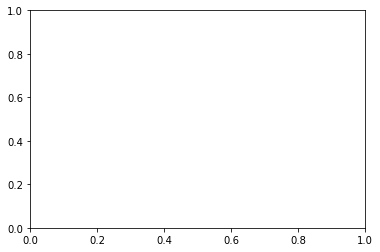

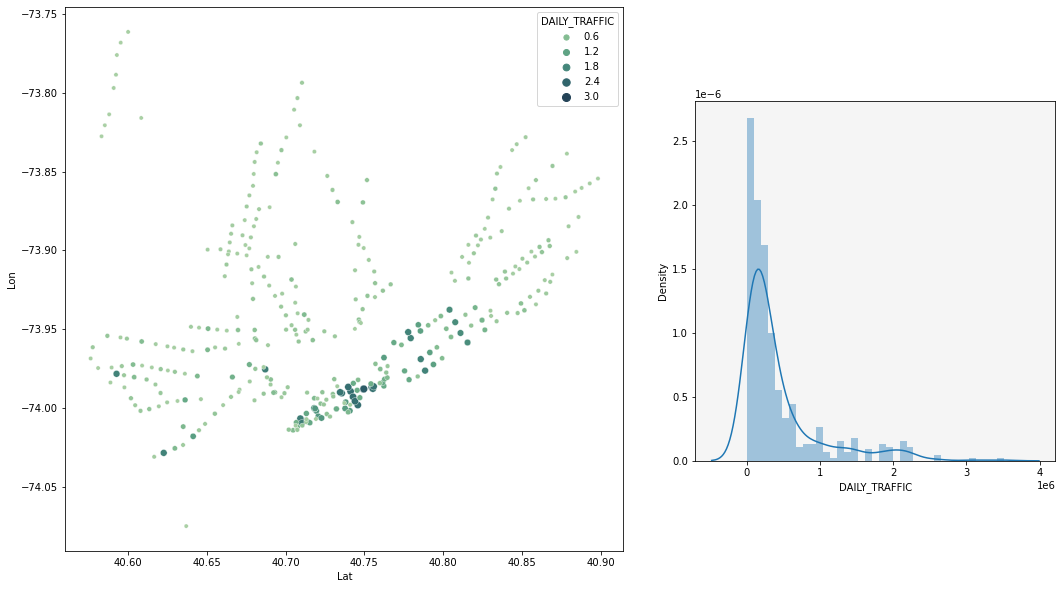

In [142]:
import seaborn as sns
fig, ax = plt.subplots();

plt.figure(figsize=(10,10));
#doesn't do anything? sns.color_palette("crest", as_cmap=True);
sns.scatterplot(x='Lat', y='Lon', hue='DAILY_TRAFFIC',s=10, size="DAILY_TRAFFIC", data=g, palette="ch:r=-.5,l=.75");
ax2 = plt.axes([1, 0.25, 0.5, 0.5], facecolor='#f5f5f5');
#sns.scatterplot(x='Lat', y='Lon', hue='DAILY_TRAFFIC', s=10, data=g, palette='ch:r=-.5,l=.75',
#               legend=False)
#ax2.margins(x=0.2, y=-0.32)

sns.distplot(g['DAILY_TRAFFIC'], ax=ax2);
#ax2.set_title('Traffic Distributions');
#ax2.set_xlim([0.9,1.])

In [14]:
x = np.ndarray(range(0, 10))
len(x)
plt.bar(t["STATION"][:10], t["DAILY_TRAFFIC"][:10])
bottom = 5028700
top = 36624603.0
plt.ylim((bottom, top)) 
plt.xticks(rotation=45);

KeyError: 'STATION'

In [ ]:
import seaborn as sns
group_station = t.groupby('STATION')['DAILY_TRAFFIC'].sum().sort_values(ascending=False)
fig1 = plt.figure(figsize=[8,6])
ax1 = sns.distplot(group_station,bins=500,kde=False)
plt.xlim([0,1000000])
plt.ylabel('No. of Stations')
plt.xlabel('Traffic over the course of 2019')
plt.title('Distribution of Station Traffic',fontsize=15,weight='bold')
sns.despine()

In [ ]:
tt = (daily
     .groupby(['DAY_NAME'], as_index=False)
     .sum()
     .sort_values('DAILY_TRAFFIC', ascending=False))


In [ ]:
from pandas.api.types import CategoricalDtype

cat_day_of_week = CategoricalDtype(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
    ordered=True
)

tt['DAY_NAME'] = tt['DAY_NAME'].astype(cat_day_of_week)

tt.sort_values(['DAY_NAME'])

### Analysis of top 10 via heatmap

In [ ]:
t.head(10)

In [ ]:
#df_10 = df[df['STATION'].isin(list(group_station.head(10).index))]
#df_10['WEEKDAY'] = df_10['DATE'].dt.day_name()
#group_station_day = df_10.groupby(['STATION','WEEKDAY'])['ENTRY_EXIT'].sum()

